In [ ]:
! pip install scikit-learn tensorflow pandas numpy shap matplotlib seaborn

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('data.csv')
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,1/1/2017 0:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,1/1/2017 0:05,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,1/1/2017 0:10,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,1/1/2017 0:15,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,1/1/2017 0:20,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [ ]:

print(df.head())
print("\n=======================")
print(df.shape)
print("\n=====================")
print(df.info())
print("\n=====================")
print(df.isna().sum())


            time Cyclone_Inlet_Gas_Temp Cyclone_Material_Temp  \
0  1/1/2017 0:00                 867.63                910.42   
1  1/1/2017 0:05                 879.23                918.14   
2  1/1/2017 0:10                 875.67                924.18   
3  1/1/2017 0:15                 875.28                923.15   
4  1/1/2017 0:20                 891.66                934.26   

  Cyclone_Outlet_Gas_draft Cyclone_cone_draft Cyclone_Gas_Outlet_Temp  \
0                  -189.54            -186.04                  852.13   
1                  -184.33             -182.1                  862.53   
2                  -181.26            -166.47                  866.06   
3                  -179.15            -174.83                  865.85   
4                  -178.32            -173.72                  876.06   

  Cyclone_Inlet_Draft  
0              -145.9  
1             -149.76  
2             -145.01  
3             -142.82  
4             -143.39  

(378719, 7)

<class 'pand

In [ ]:
for col in df.columns:
    if col != 'time':
        df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.dtypes)

time                         object
Cyclone_Inlet_Gas_Temp      float64
Cyclone_Material_Temp       float64
Cyclone_Outlet_Gas_draft    float64
Cyclone_cone_draft          float64
Cyclone_Gas_Outlet_Temp     float64
Cyclone_Inlet_Draft         float64
dtype: object


In [ ]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.set_index('time')
df = df.sort_index()
print(df.info())
print("\n=====================")
print(df.describe().T)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 378719 entries, 2017-01-01 00:00:00 to NaT
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Cyclone_Inlet_Gas_Temp    376399 non-null  float64
 1   Cyclone_Material_Temp     376128 non-null  float64
 2   Cyclone_Outlet_Gas_draft  376398 non-null  float64
 3   Cyclone_cone_draft        376399 non-null  float64
 4   Cyclone_Gas_Outlet_Temp   376398 non-null  float64
 5   Cyclone_Inlet_Draft       376397 non-null  float64
dtypes: float64(6)
memory usage: 20.2 MB
None

                             count        mean         std     min       25%  \
Cyclone_Inlet_Gas_Temp    376399.0  727.348549  328.664814    0.00  856.2700   
Cyclone_Material_Temp     376128.0  750.830483  350.921068 -185.00  867.6675   
Cyclone_Outlet_Gas_draft  376398.0 -177.820685   99.147236 -456.66 -247.1900   
Cyclone_cone_draft        376399.0 -164.572619   90.10302

In [6]:
df.isna().sum()

Cyclone_Inlet_Gas_Temp      2320
Cyclone_Material_Temp       2591
Cyclone_Outlet_Gas_draft    2321
Cyclone_cone_draft          2320
Cyclone_Gas_Outlet_Temp     2321
Cyclone_Inlet_Draft         2322
dtype: int64

In [ ]:
print((df.isna().mean() * 100).round(3))

#longest consecutive rows of NaNs per column
def longest_nan_run(s):
    isna = s.isna()
    return isna.groupby((~isna).cumsum()).sum().max()

print("\nlongest consecutive rows of NaNs per column:")
for col in df.columns:
    print(col, "->", longest_nan_run(df[col]))


Cyclone_Inlet_Gas_Temp      0.613
Cyclone_Material_Temp       0.684
Cyclone_Outlet_Gas_draft    0.613
Cyclone_cone_draft          0.613
Cyclone_Gas_Outlet_Temp     0.613
Cyclone_Inlet_Draft         0.613
dtype: float64

longest consecutive rows of NaNs per column:
Cyclone_Inlet_Gas_Temp -> 1000
Cyclone_Material_Temp -> 1000
Cyclone_Outlet_Gas_draft -> 1000
Cyclone_cone_draft -> 1000
Cyclone_Gas_Outlet_Temp -> 1000
Cyclone_Inlet_Draft -> 1000


## Can drop nan as they are less than 1% 

In [8]:
print("Rows before dropping NaT index:", len(df))
df = df[~df.index.isna()]
print("Rows after dropping NaT index:", len(df))


Rows before dropping NaT index: 378719
Rows after dropping NaT index: 377719


## Interpolate up to 1 hour gaps

In [9]:

df_interpolated = df.interpolate(
    method="time",
    limit=12,           
    limit_direction="both" 
)

print("\nNaNs AFTER interpolation (short gaps filled):")
print(df_interpolated.isna().sum())



NaNs AFTER interpolation (short gaps filled):
Cyclone_Inlet_Gas_Temp      699
Cyclone_Material_Temp       699
Cyclone_Outlet_Gas_draft    699
Cyclone_cone_draft          699
Cyclone_Gas_Outlet_Temp     699
Cyclone_Inlet_Draft         699
dtype: int64


In [10]:
df_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 377719 entries, 2017-01-01 00:00:00 to 2020-08-07 12:15:00
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Cyclone_Inlet_Gas_Temp    377020 non-null  float64
 1   Cyclone_Material_Temp     377020 non-null  float64
 2   Cyclone_Outlet_Gas_draft  377020 non-null  float64
 3   Cyclone_cone_draft        377020 non-null  float64
 4   Cyclone_Gas_Outlet_Temp   377020 non-null  float64
 5   Cyclone_Inlet_Draft       377020 non-null  float64
dtypes: float64(6)
memory usage: 20.2 MB


In [11]:
df_interpolated.isna().sum()

Cyclone_Inlet_Gas_Temp      699
Cyclone_Material_Temp       699
Cyclone_Outlet_Gas_draft    699
Cyclone_cone_draft          699
Cyclone_Gas_Outlet_Temp     699
Cyclone_Inlet_Draft         699
dtype: int64

In [ ]:
df_clean = df_interpolated.copy()
df_clean['temp_outlier'] = (
    (df_clean['Cyclone_Inlet_Gas_Temp'] < 50) |
    (df_clean['Cyclone_Inlet_Gas_Temp'] > 1300)
).astype(int)

df_clean['pressure_outlier'] = (
    (df_clean['Cyclone_Outlet_Gas_draft'] < -500) |
    (df_clean['Cyclone_Outlet_Gas_draft'] > 100)
).astype(int)

print(df_clean[['temp_outlier', 'pressure_outlier']].sum())


temp_outlier        57702
pressure_outlier        0
dtype: int64


In [ ]:
window = 12  

df_clean['temp_roll_mean'] = df_clean['Cyclone_Inlet_Gas_Temp'].rolling(window).mean()
df_clean['temp_roll_std'] = df_clean['Cyclone_Inlet_Gas_Temp'].rolling(window).std()
df_clean['temp_z'] = (df_clean['Cyclone_Inlet_Gas_Temp'] - df_clean['temp_roll_mean']) / df_clean['temp_roll_std']
df_clean['temp_spike'] = (df_clean['temp_z'].abs() > 3).astype(int)
print(df_clean['temp_spike'].sum())


230


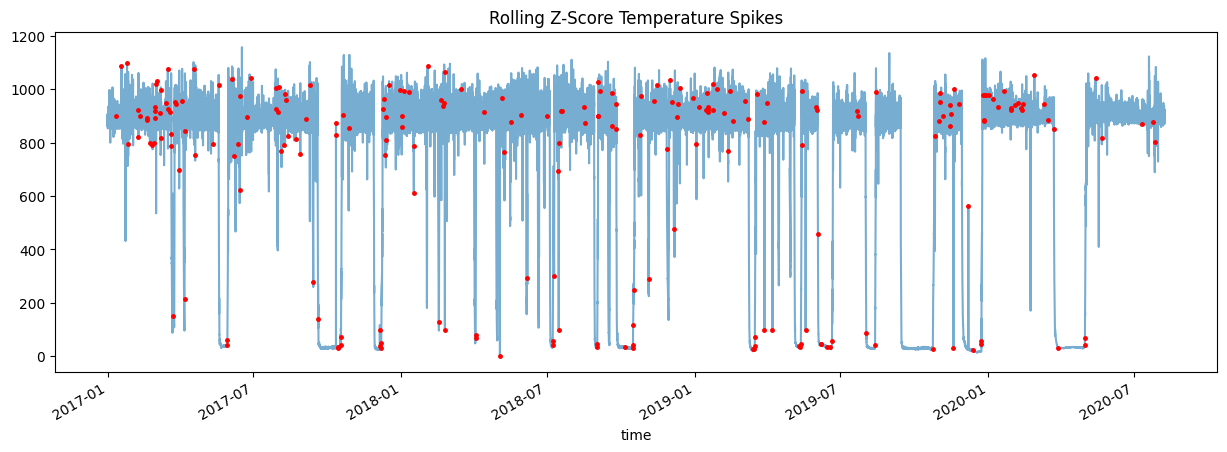

In [14]:
df_clean['Cyclone_Inlet_Gas_Temp'].plot(figsize=(15,5), alpha=0.6)
df_clean[df_clean['temp_spike']==1]['Cyclone_Inlet_Gas_Temp'].plot(style='r.', markersize=5)
plt.title("Rolling Z-Score Temperature Spikes")
plt.show()


Outliers per column (|z| > 3):
Cyclone_Inlet_Gas_Temp         0
Cyclone_Material_Temp          0
Cyclone_Outlet_Gas_draft       0
Cyclone_cone_draft             3
Cyclone_Gas_Outlet_Temp        0
Cyclone_Inlet_Draft            2
temp_outlier                   0
pressure_outlier               0
temp_roll_mean                 0
temp_roll_std               4573
temp_z                         0
temp_spike                   230
dtype: int64


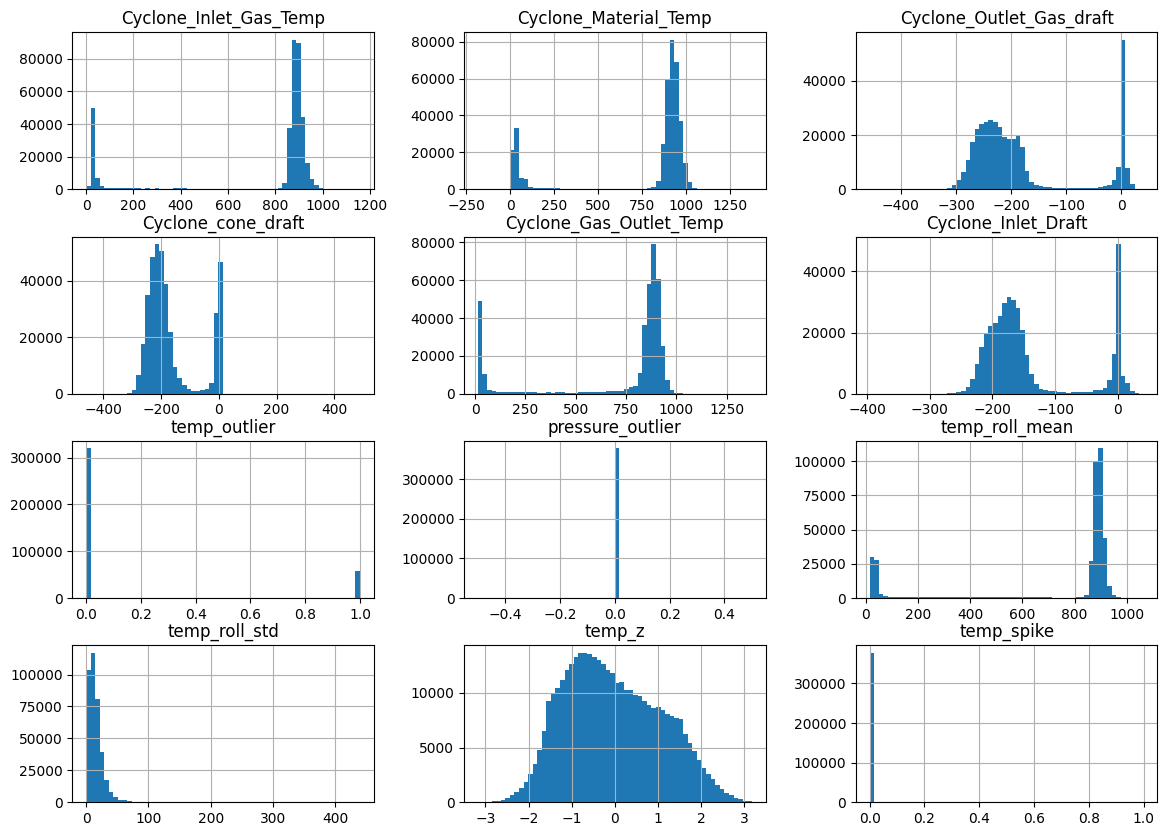

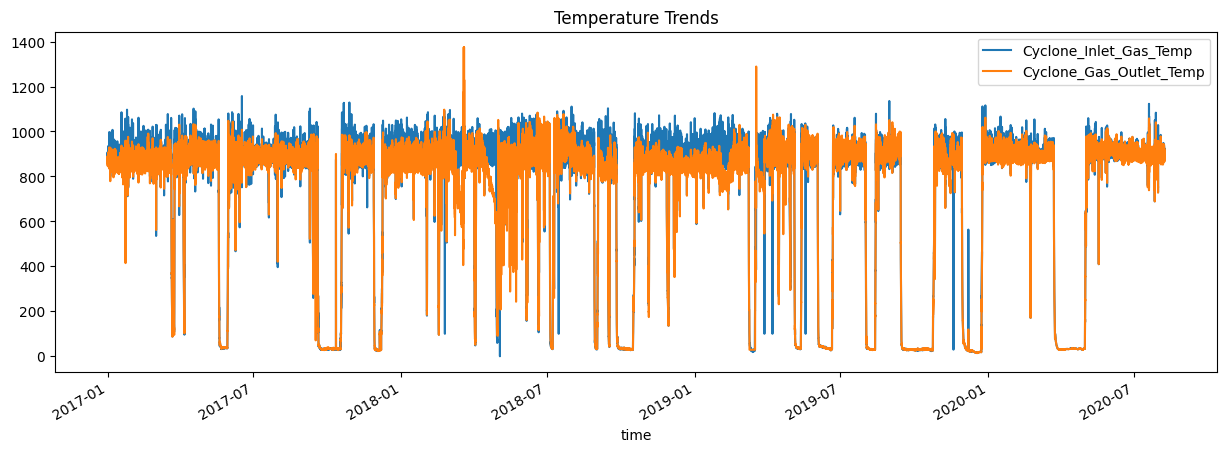

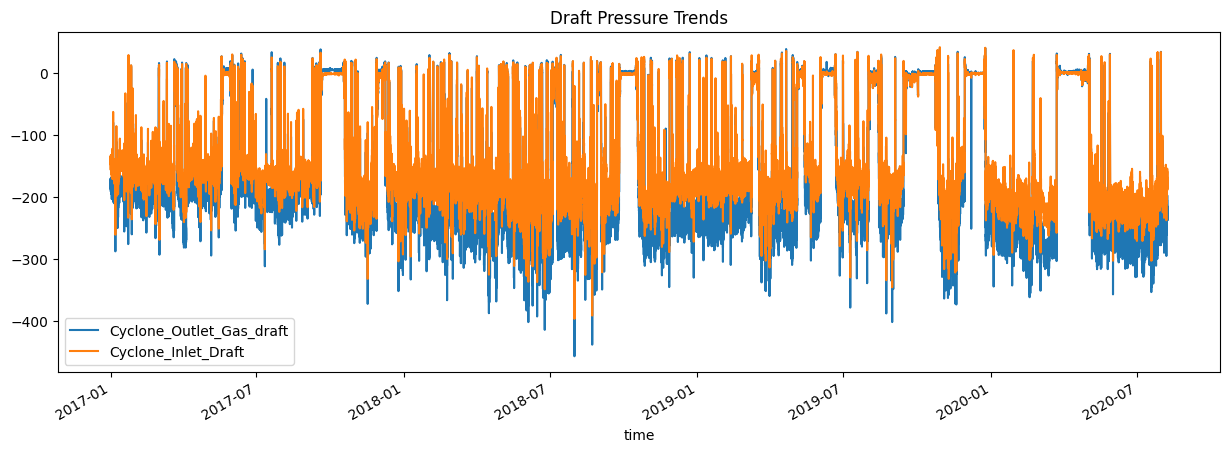

In [ ]:

z_scores = (df_clean - df_clean.mean()) / df_clean.std()
outliers = (np.abs(z_scores) > 3).sum()

print("Outliers per column (|z| > 3):")
print(outliers)
df_clean.hist(bins=60, figsize=(14, 10))
plt.show()
df_clean[['Cyclone_Inlet_Gas_Temp', 'Cyclone_Gas_Outlet_Temp']].plot(figsize=(15,5), title="Temperature Trends")
plt.show()

df_clean[['Cyclone_Outlet_Gas_draft', 'Cyclone_Inlet_Draft']].plot(figsize=(15,5), title="Draft Pressure Trends")
plt.show()


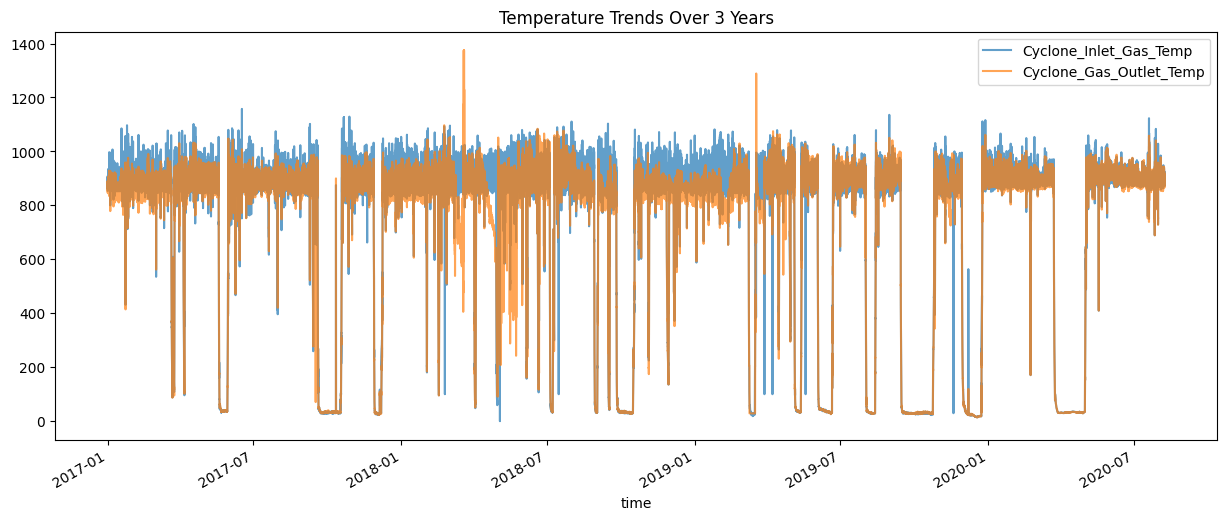

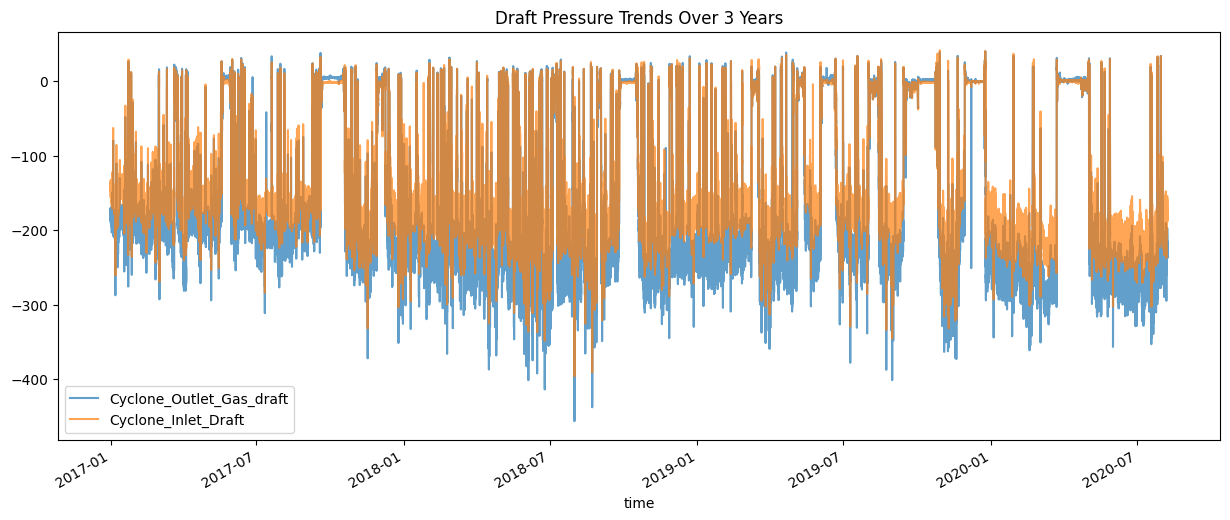

In [ ]:
df_clean[['Cyclone_Inlet_Gas_Temp', 'Cyclone_Gas_Outlet_Temp']].plot(figsize=(15,6), alpha=0.7)
plt.title("Temperature Trends Over 3 Years")
plt.show()

df_clean[['Cyclone_Outlet_Gas_draft', 'Cyclone_Inlet_Draft']].plot(figsize=(15,6), alpha=0.7)
plt.title("Draft Pressure Trends Over 3 Years")
plt.show()


# Outlier

Physical temperature outliers:

temp_outlier >>> 57702

Huge dataset portion is looking outlier but it is not random noise
Rolling statistical spikes	235	Sudden deviations
Pressure physical outliers= 0	Pressure stays within limits

1) Many temperature values fall outside defined valid range but they are not random — they correspond to shutdowns, cooling cycles.This means temperature outliers should not be removed — they define operating ranges

2) Interpretation of the Temperature Spike Plot

From the plot:

Most spikes occur during normal operation, not during shutdowns

Spikes appear clustered in certain operational seasons (possibly load changes)

Downward drops correspond to shutdown cycles (not anomalies)

Upward spikes look like true anomalies

So outlier logic should separate:

1) Low temps >>> long blocks	Intended shutdowns of machines will	Mark as operational states, not anomalies
2) Low temps >>> sudden single drop	Sensor error → anomaly
3) High temp sudden spike >>> anomaly


In [ ]:
df_clean['regime'] = np.where(df_clean['Cyclone_Inlet_Gas_Temp'] < 200, 'shutdown', 'normal')
print(df_clean['regime'].value_counts())

regime
normal      312029
shutdown     65690
Name: count, dtype: int64


In [ ]:
df_clean['shutdown_flag'] = (df_clean['regime'] == 'shutdown').astype(int)
df_clean['shutdown_blocks'] = df_clean['shutdown_flag'].diff().fillna(0).ne(0).cumsum()

shutdown_segments = df_clean[df_clean['regime'] == 'shutdown'].groupby('shutdown_blocks').agg({
    'shutdown_flag': 'count'
}).rename(columns={'shutdown_flag': 'duration_points'})

print(shutdown_segments.head(15))


                 duration_points
shutdown_blocks                 
1                            250
3                            224
5                              1
7                            192
9                             24
11                           236
13                          2786
15                            18
17                          3941
19                           188
21                          1611
23                          1826
25                             4
27                          2643
29                             5


In [19]:
shutdown_segments['duration_hours'] = shutdown_segments['duration_points'] * 5 / 60
shutdown_segments['shutdown_type'] = np.where(
    shutdown_segments['duration_points'] <= 3, 'micro_shutdown',  # Label anomalies based on rules
    np.where(shutdown_segments['duration_hours'] > 48, 'long_shutdown', 'normal_shutdown')
)

print(shutdown_segments['shutdown_type'].value_counts())
print(shutdown_segments.head(20))


shutdown_type
normal_shutdown    31
long_shutdown      16
micro_shutdown     14
Name: count, dtype: int64
                 duration_points  duration_hours    shutdown_type
shutdown_blocks                                                  
1                            250       20.833333  normal_shutdown
3                            224       18.666667  normal_shutdown
5                              1        0.083333   micro_shutdown
7                            192       16.000000  normal_shutdown
9                             24        2.000000  normal_shutdown
11                           236       19.666667  normal_shutdown
13                          2786      232.166667    long_shutdown
15                            18        1.500000  normal_shutdown
17                          3941      328.416667    long_shutdown
19                           188       15.666667  normal_shutdown
21                          1611      134.250000    long_shutdown
23                          1826    

## Anomaly

In [20]:
df_clean['anomaly_rule_based'] = 0
df_clean.loc[df_clean['temp_spike'] == 1, 'anomaly_rule_based'] = 1


df_clean.loc[
    (df_clean['temp_outlier'] == 1) & (df_clean['regime'] == 'normal'), # Mark physically impossible temperature values (but exclude shutdown states)
    'anomaly_rule_based'
] = 1
df_clean.loc[
    df_clean['shutdown_blocks'].isin(
        shutdown_segments[shutdown_segments['shutdown_type']=='micro_shutdown'].index
    ),
    'anomaly_rule_based'
] = 1

print(df_clean['anomaly_rule_based'].value_counts())


anomaly_rule_based
0    377472
1       247
Name: count, dtype: int64


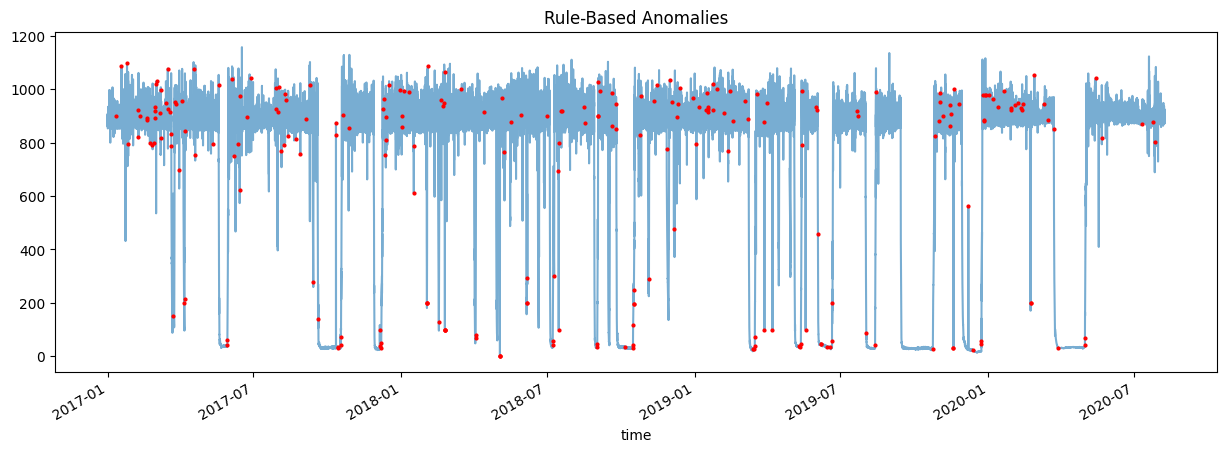

In [ ]:
df_clean['Cyclone_Inlet_Gas_Temp'].plot(figsize=(15,5), alpha=0.6)
df_clean[df_clean['anomaly_rule_based']==1]['Cyclone_Inlet_Gas_Temp'].plot(
    style='r.', markersize=4)
plt.title("Rule-Based Anomalies")
plt.show()


In [ ]:

num_cols = df_clean.select_dtypes(include='number').columns
df_corr = df_clean[df_clean['regime'] == 'normal'][num_cols]
corr_matrix = df_corr.corr()
corr_matrix


,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,temp_outlier,pressure_outlier,temp_roll_mean,temp_roll_std,temp_z,temp_spike,shutdown_flag,shutdown_blocks,anomaly_rule_based
Cyclone_Inlet_Gas_Temp,1.000000,0.826633,-0.743265,-0.713787,0.904542,-0.746360,NaN,NaN,0.974440,0.126740,0.186976,0.002979,NaN,0.028286,0.002979
Cyclone_Material_Temp,0.826633,1.000000,-0.618510,-0.598855,0.753683,-0.619456,NaN,NaN,0.803936,0.118914,0.210329,-0.002192,NaN,-0.003732,-0.002192
Cyclone_Outlet_Gas_draft,-0.743265,-0.618510,1.000000,0.905087,-0.692595,0.986561,NaN,NaN,-0.750070,0.101953,-0.052371,0.013411,NaN,-0.281525,0.013411
Cyclone_cone_draft,-0.713787,-0.598855,0.905087,1.000000,-0.652455,0.908782,NaN,NaN,-0.718887,0.073640,-0.055809,0.011183,NaN,-0.055265,0.011183
Cyclone_Gas_Outlet_Temp,0.904542,0.753683,-0.692595,-0.652455,1.000000,-0.700932,NaN,NaN,0.900029,0.082654,0.102535,-0.004495,NaN,0.070835,-0.004495
Cyclone_Inlet_Draft,-0.746360,-0.619456,0.986561,0.908782,-0.700932,1.000000,NaN,NaN,-0.752504,0.107966,-0.054274,0.013596,NaN,-0.243552,0.013596
temp_outlier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pressure_outlier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp_roll_mean,0.974440,0.803936,-0.750070,-0.718887,0.900029,-0.752504,NaN,NaN,1.000000,0.100220,0.008713,-0.009503,NaN,0.028474,-0.009503
temp_roll_std,0.126740,0.118914,0.101953,0.073640,0.082654,0.107966,NaN,NaN,0.100220,1.000000,0.009321,0.016678,NaN,-0.063465,0.016678


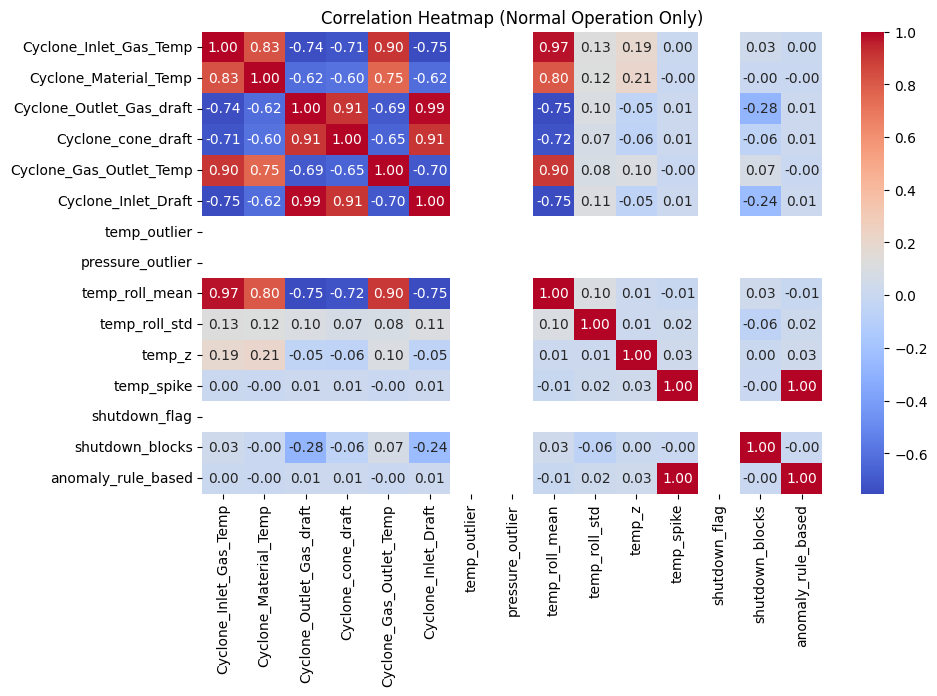

In [ ]:



plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Normal Operation Only)")
plt.show()


##  Correleation

### Temperatures Are Highly Correlated

1) Inlet Temp ↔ Outlet Temp	    0.91	>>>    Strong thermal dependency
2) Inlet Temp ↔ Material Temp	0.83	>>>    Material heating depends on inlet gas temp
3) Outlet Temp ↔ Material Temp	0.76	>>>    Heat transfer system behaving predictably

This suggests temperature-based anomalies should be detected using multi-sensor relationships, not single thresholds.

### Temperature and  Pressure Are Strongly Negatively Correlated

1) Inlet Temp and Outlet Draft	-0.74	Higher temperature likely causes more flow + suction draw
2) Inlet Temp and Cone Draft	    -0.71	Same trend


### Pressure Sensors Are Highly Correlated with Each Other

Outlet Draft and Inlet Draft	0.986 
Cone Draft and  Outlet Draft	0.905

➡ Strong relationship means pressures move together →
If one sensor deviates while others remain correlated → sensor failure anomaly.

### Shutdowns do not  correlate strongly with temperatures

All shutdown flag correlations show NaN because we filtered shutdown rows out, so this is expected.
Correlation shows predictable relationships

## Feature

1) temp_drop	>> inlet – outlet	Heat transfer efficiency
2) pressure_drop >>	inlet – outlet	Flow resistance
3) dT/dt	>> temperature change for detecting Sudden transitions
4) rolling_mean, rolling_std	>> for smoothing	


## Feature Engineering

In [24]:
df_feat = df_clean.copy()
df_feat['temp_drop'] = df_feat['Cyclone_Inlet_Gas_Temp'] - df_feat['Cyclone_Gas_Outlet_Temp']
df_feat['temp_ratio'] = df_feat['Cyclone_Gas_Outlet_Temp'] / df_feat['Cyclone_Inlet_Gas_Temp']
df_feat['pressure_drop'] = df_feat['Cyclone_Inlet_Draft'] - df_feat['Cyclone_Outlet_Gas_draft']
df_feat['pressure_ratio'] = df_feat['Cyclone_Outlet_Gas_draft'] / df_feat['Cyclone_Inlet_Draft']
df_feat['dT_dt'] = df_feat['Cyclone_Inlet_Gas_Temp'].diff()
df_feat['dP_dt'] = df_feat['Cyclone_Inlet_Draft'].diff()
df_feat['temp_roll_mean_1h'] = df_feat['Cyclone_Inlet_Gas_Temp'].rolling(12).mean()
df_feat['temp_roll_std_1h'] = df_feat['Cyclone_Inlet_Gas_Temp'].rolling(12).std()
df_feat['pressure_roll_mean_1h'] = df_feat['Cyclone_Inlet_Draft'].rolling(12).mean()
df_feat['pressure_roll_std_1h'] = df_feat['Cyclone_Inlet_Draft'].rolling(12).std()

print(df_feat)

                     Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
time                                                                 
2017-01-01 00:00:00                  867.63                 910.42   
2017-01-01 00:05:00                  879.23                 918.14   
2017-01-01 00:10:00                  875.67                 924.18   
2017-01-01 00:15:00                  875.28                 923.15   
2017-01-01 00:20:00                  891.66                 934.26   
...                                     ...                    ...   
2020-08-07 11:55:00                  899.42                 919.79   
2020-08-07 12:00:00                  879.90                 895.02   
2020-08-07 12:05:00                  887.20                 895.70   
2020-08-07 12:10:00                  908.50                 916.33   
2020-08-07 12:15:00                  880.86                 905.31   

                     Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  \
time                

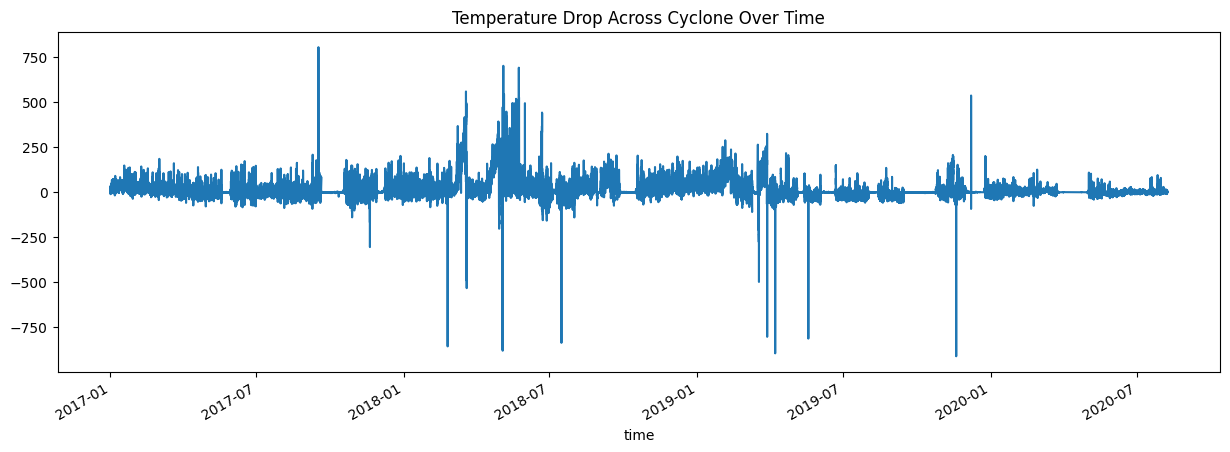

In [ ]:
df_feat['temp_drop'].plot(figsize=(15,5))
plt.title("Temperature Drop Across Cyclone Over Time")
plt.show()


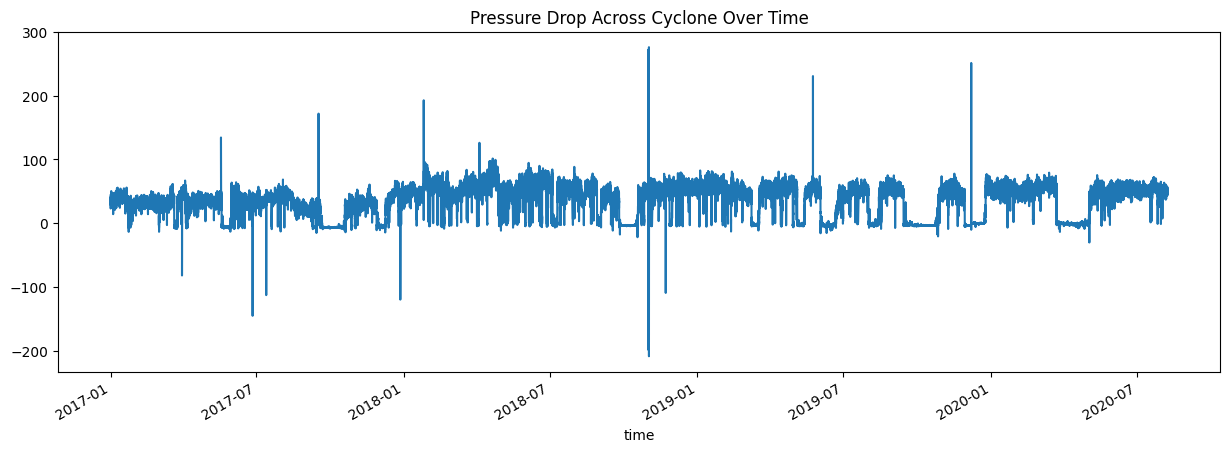

In [ ]:
df_feat['pressure_drop'].plot(figsize=(15,5))
plt.title("Pressure Drop Across Cyclone Over Time")
plt.show()


## temp_drop plot

1) Mostly small positive values ( 0–150°C) >> normal heat transfer

2) Big positive spikes >> outlet much colder than inlet >> strong heat extraction

3) Large negative values (drop below zero) → outlet hotter than inlet >> anomaly

So temp_drop nicely highlights weird behavior that raw temps alone would hide.

## pressure_drop plot

1) Generally around 30–80  >> normal flow resistance

2) Large positive spikes 150–250 >> big pressure loss → possible blockage

3) Deep negative spikes >> inconsistent pressure → anomaly

Numeric columns used: ['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp', 'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft', 'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft', 'temp_outlier', 'pressure_outlier', 'temp_roll_mean', 'temp_roll_std', 'temp_z', 'temp_spike', 'shutdown_flag', 'shutdown_blocks', 'anomaly_rule_based', 'temp_drop', 'temp_ratio', 'pressure_drop', 'pressure_ratio', 'dT_dt', 'dP_dt', 'temp_roll_mean_1h', 'temp_roll_std_1h', 'pressure_roll_mean_1h', 'pressure_roll_std_1h']
                          Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
Cyclone_Inlet_Gas_Temp                  1.000000               0.826633   
Cyclone_Material_Temp                   0.826633               1.000000   
Cyclone_Outlet_Gas_draft               -0.743265              -0.618510   
Cyclone_cone_draft                     -0.713787              -0.598855   
Cyclone_Gas_Outlet_Temp                 0.904542               0.753683   
Cyclone_Inlet_Draft                    -0.746360     

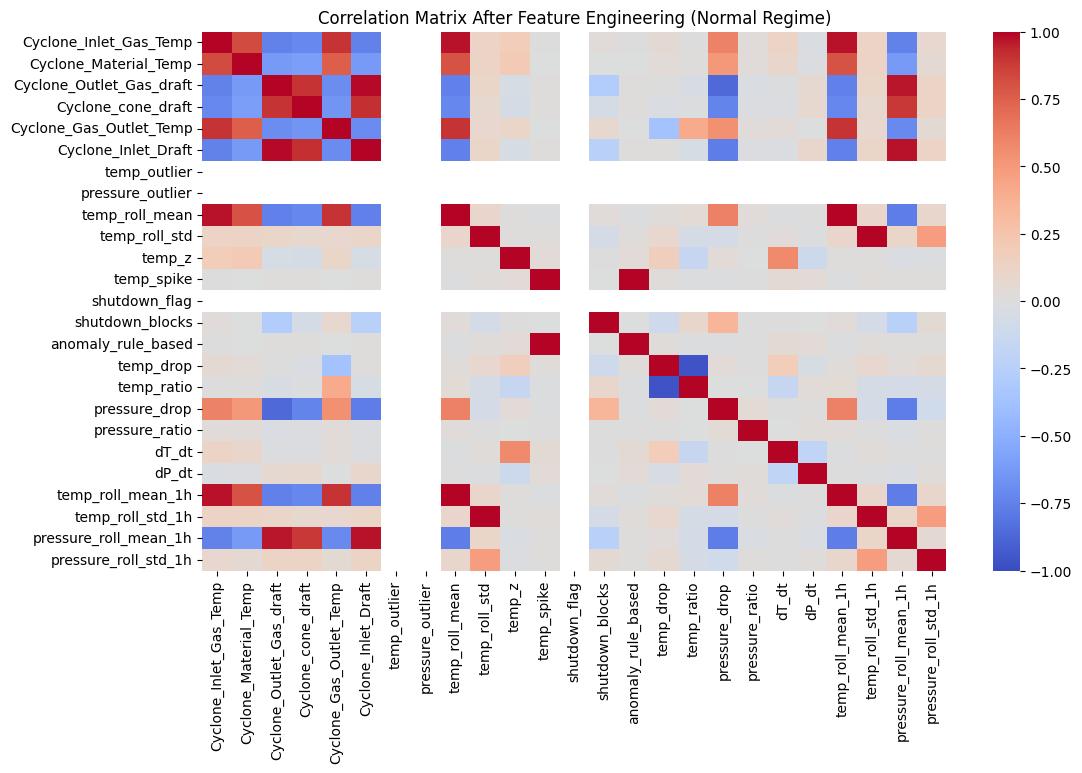

In [ ]:
df_corr_feat = df_feat[df_feat['regime'] == 'normal']

num_cols = df_corr_feat.select_dtypes(include='number').columns
print("Numeric columns used:", list(num_cols))

corr2 = df_corr_feat[num_cols].corr()
print(corr2)

plt.figure(figsize=(12,7))
sns.heatmap(corr2, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix After Feature Engineering (Normal Regime)")
plt.show()


## Correleation

1) Inlet & Outlet Temperature are highly correlated
Cyclone_Inlet_Gas_Temp >> Cyclone_Gas_Outlet_Temp that is Temperature moves together — heat transfer is stable
temp_roll_mean_1h >> inlet temp	that is	Rolling averages capture the trend well

Good for trend modeling  so LSTM Autoencoder can be used

2) Pressure variables strongly cluster together
Cyclone_Outlet_Gas_draft >> Cyclone_Inlet_Draft	that is Pressures move as a system
pressure_roll_mean_1h >> drafts	that is Rolling pressure is reliable

Pressure variables are internally consistent → good for anomaly scoring (IsolationForest)

3) Temperature drop is mostly independent
temp_drop is valuable because it captures event behavior

4) Pressure drop is strongly tied to inlet pressure
pressure_drop vs Cyclone_Inlet_Draft that is greater pressure drop

Pressure drop will good to detct anomalies

5) Time derivatives (dT_dt, dP_dt) are mostly uncorrelated
dT_dt correlation values low	good: captures rapid thermal changes like anomaly
dP_dt nearly uncorrelated	good: detects sudden pressure shocks for anomaly


# Insight About the Process

This cyclone preheater operates in multiple regimes, not just normal operation vs anomaly.

Identified Regimes:

1) Normal steady operation	Temps ~850–950°C, stable pressure
2) Shutdown cycles	Temps drop to 0–200°C for long continuous blocks
3) Heat spikes 	Sudden short rises to 1100°C+	Z-score spike  anomaly detection

## Insights From Raw Temperature Data
There are two clear operating temperatures:

High stable band: ~850–1000°C → process running normally

Low band: ~0–150°C → shutdown 

These low values are not outliers, they are a real part of operation.


If we removed "outliers", we delete real shutdown history > losing anomaly context.


## Insights From Pressure Data

Pressure values behave differently:

Draft values are highly correlated and move together

Occasional drops to near zero or just positive likely anomalies

## Shutdown Behavior 

1) Normal shutdowns	many	can be maintenance 
2) Micro shutdowns	very short, few points	sensor issue
3) Long shutdowns	very large blocks	full system downtime


## Feature Engineering Insights 

1) temp_drop (Inlet – Outlet temp)

Behavior:

Normal: 10–80°C

Shutdown: 0

Anomaly: negative or >200°C

Negative = outlet hotter than inlet it is physically impossible → anomaly

2) pressure_drop (Outlet – Inlet pressure)

Behavior:

Normal: 30–80

Sudden spikes > 150 :likely anomaly

Extreme negative :measurement fault

3) dT_dt / dP_dt (rate of change)

Mostly near zero

Large sudden changes correspond to spikes, not shutdowns .Good for point anomaly detection

4) Rolling Stats (context features)

Rolling std captures fluctuations vs steady state

## Models use
1) Isolation Forest 
2) LOF 
3) LSTM


In [28]:
features = [
    "Cyclone_Inlet_Gas_Temp",
    "Cyclone_Gas_Outlet_Temp",
    "Cyclone_Inlet_Draft",
    "Cyclone_Outlet_Gas_draft",
    "temp_drop",
    "pressure_drop",
    "dT_dt",
    "dP_dt",
]
df_model = df_feat[features].dropna()


## Isolation Forest

In [29]:
features = [
    "Cyclone_Inlet_Gas_Temp",
    "Cyclone_Gas_Outlet_Temp",
    "Cyclone_Inlet_Draft",
    "Cyclone_Outlet_Gas_draft",
    "temp_drop",
    "pressure_drop",
    "dT_dt",
    "dP_dt"
]

df_model = df_feat[features].copy()

print("Rows before dropping NaN:", len(df_model))
df_model = df_model.dropna()
print("Rows after dropping NaN:", len(df_model))

df_model.head()


Rows before dropping NaN: 377719
Rows after dropping NaN: 377011


,Cyclone_Inlet_Gas_Temp,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Cyclone_Outlet_Gas_draft,temp_drop,pressure_drop,dT_dt,dP_dt
time,,,,,,,,
2017-01-01 00:05:00,879.23,862.53,-149.76,-184.33,16.70,34.57,11.60,-3.86
2017-01-01 00:10:00,875.67,866.06,-145.01,-181.26,9.61,36.25,-3.56,4.75
2017-01-01 00:15:00,875.28,865.85,-142.82,-179.15,9.43,36.33,-0.39,2.19
2017-01-01 00:20:00,891.66,876.06,-143.39,-178.32,15.60,34.93,16.38,-0.57
2017-01-01 00:25:00,878.54,870.31,-146.92,-188.37,8.23,41.45,-13.12,-3.53


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

X_scaled.shape


(377011, 8)

In [32]:
from sklearn.ensemble import IsolationForest

In [31]:


iso = IsolationForest(
    n_estimators=200,
    contamination=0.01,
    random_state=42,
    bootstrap=True
)

iso.fit(X_scaled)

df_model["anomaly_iforest"] = iso.predict(X_scaled)

df_model["anomaly_iforest"] = df_model["anomaly_iforest"].map({1:0, -1:1})

print(df_model["anomaly_iforest"].value_counts())


anomaly_iforest
0    373240
1      3771
Name: count, dtype: int64


In [32]:
df_model.index = df_feat.loc[df_model.index].index 

print(df_model.head())


                     Cyclone_Inlet_Gas_Temp  Cyclone_Gas_Outlet_Temp  \
time                                                                   
2017-01-01 00:05:00                  879.23                   862.53   
2017-01-01 00:10:00                  875.67                   866.06   
2017-01-01 00:15:00                  875.28                   865.85   
2017-01-01 00:20:00                  891.66                   876.06   
2017-01-01 00:25:00                  878.54                   870.31   

                     Cyclone_Inlet_Draft  Cyclone_Outlet_Gas_draft  temp_drop  \
time                                                                            
2017-01-01 00:05:00              -149.76                   -184.33      16.70   
2017-01-01 00:10:00              -145.01                   -181.26       9.61   
2017-01-01 00:15:00              -142.82                   -179.15       9.43   
2017-01-01 00:20:00              -143.39                   -178.32      15.60   
2017-01-0

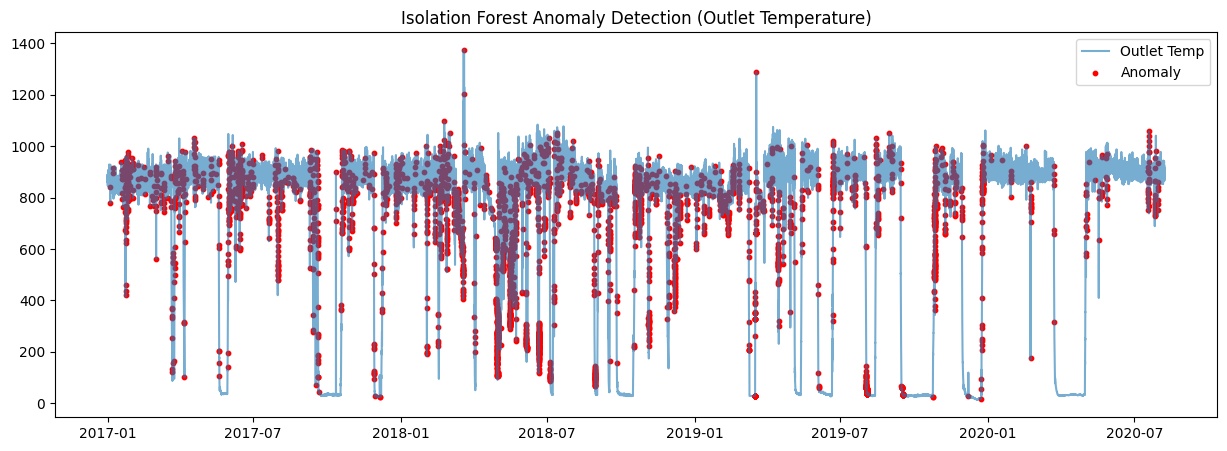

In [33]:
plt.figure(figsize=(15,5))
plt.plot(df_model.index, df_model["Cyclone_Gas_Outlet_Temp"], label="Outlet Temp", alpha=0.6)

anomaly_points = df_model[df_model["anomaly_iforest"] == 1]
plt.scatter(anomaly_points.index, anomaly_points["Cyclone_Gas_Outlet_Temp"],
            color="red", s=10, label="Anomaly")

plt.title("Isolation Forest Anomaly Detection (Outlet Temperature)")
plt.legend()
plt.show()


### model is flagging abnormal behavior during operation, not just when temperature drops. This is what we need.

1) **0–100°C (shutdown)**   :few anomalies    -----   shutdowns treated correctly as normal states
2) **800–1000°C (runtime)** :many anomalies   ----- spikes, instability, thermal drift      
3) **>1100°C**              :marked as anomalies ----- overheating / overshoot events            


## Too many anomalies in stable mid-range (~850–950°C)

There are dense red points even when temperature is visually stable. This means:

model might be picking subtle fluctuations rather than true faults

features may over-emphasize derivatives or variance

Can fix this through tuning.

In [33]:
iso = IsolationForest(
    n_estimators=300,
    contamination=0.005,   # half previous anomaly rate
    random_state=42
)
iso.fit(X_scaled)
df_model["anomaly_iforest"] = iso.predict(X_scaled)   # 1 = normal -1 = anomaly

df_model["anomaly_iforest"] = df_model["anomaly_iforest"].map({1:0, -1:1})

print(df_model["anomaly_iforest"].value_counts())


anomaly_iforest
0    375125
1      1886
Name: count, dtype: int64


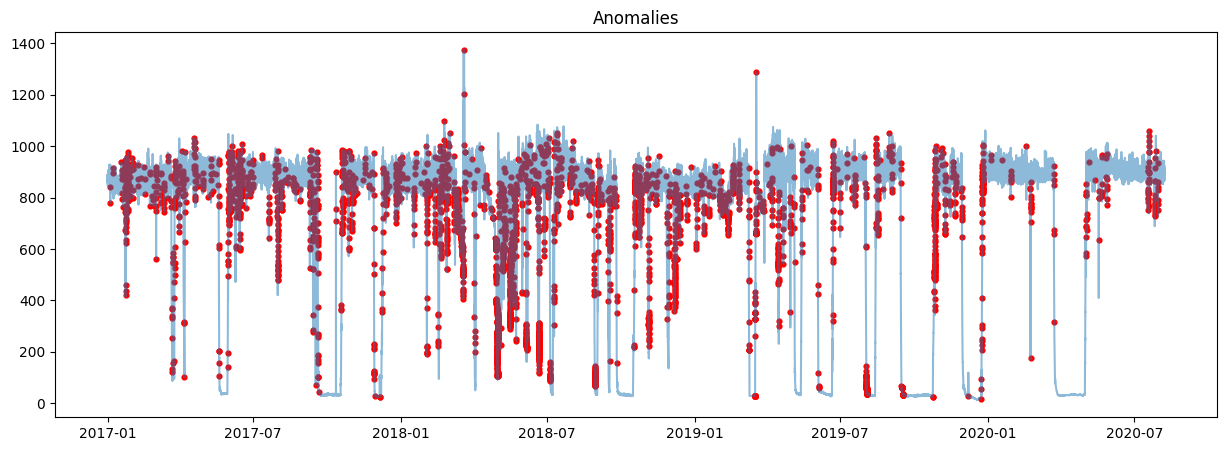

In [34]:
sample = df_model

plt.figure(figsize=(15,5))
plt.plot(sample.index, sample["Cyclone_Gas_Outlet_Temp"], alpha=0.5)
plt.scatter(sample.index[sample["anomaly_iforest"]==1], sample["Cyclone_Gas_Outlet_Temp"][sample["anomaly_iforest"]==1],
            color="red", s=12)
plt.title("Anomalies")
plt.show()


### Anomalies are now focused around real thermal events, not randomly scattered.

We see clear anomalies around:

Sudden downward dips

Sharp recovery rise after shutdown

Isolated spikes above ~1000–1200°C

Localized instability clusters

Shutdown region (March 12–17 range) is not entirely as anomalies

Instead, only transitions into/out of shutdown are flagged.

That means the model is now detecting operational event edges, not mislabeling entire low-temp blocks.

# Univariate training for each column 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

univariate_results = {}

for col in features:

    series = df_feat[col].dropna()
    scaler_uni = StandardScaler()
    X_uni = scaler_uni.fit_transform(series.values.reshape(-1,1))
    
    model_uni = IsolationForest(
        n_estimators=200,
        contamination=0.01,
        random_state=42
    )
    preds = model_uni.fit_predict(X_uni)
    
    df_tmp = pd.DataFrame({
        "value": series,
        "anomaly": np.where(preds == -1, 1, 0)
    }, index=series.index)

    univariate_results[col] = df_tmp
    
    print(df_tmp["anomaly"].value_counts())



=== Processing Cyclone_Inlet_Gas_Temp ===
anomaly
0    373355
1      3665
Name: count, dtype: int64

=== Processing Cyclone_Gas_Outlet_Temp ===
anomaly
0    373319
1      3701
Name: count, dtype: int64

=== Processing Cyclone_Inlet_Draft ===
anomaly
0    373282
1      3738
Name: count, dtype: int64

=== Processing Cyclone_Outlet_Gas_draft ===
anomaly
0    373273
1      3747
Name: count, dtype: int64

=== Processing temp_drop ===
anomaly
0    373259
1      3761
Name: count, dtype: int64

=== Processing pressure_drop ===
anomaly
0    373256
1      3764
Name: count, dtype: int64

=== Processing dT_dt ===
anomaly
0    373245
1      3766
Name: count, dtype: int64

=== Processing dP_dt ===
anomaly
0    373244
1      3767
Name: count, dtype: int64


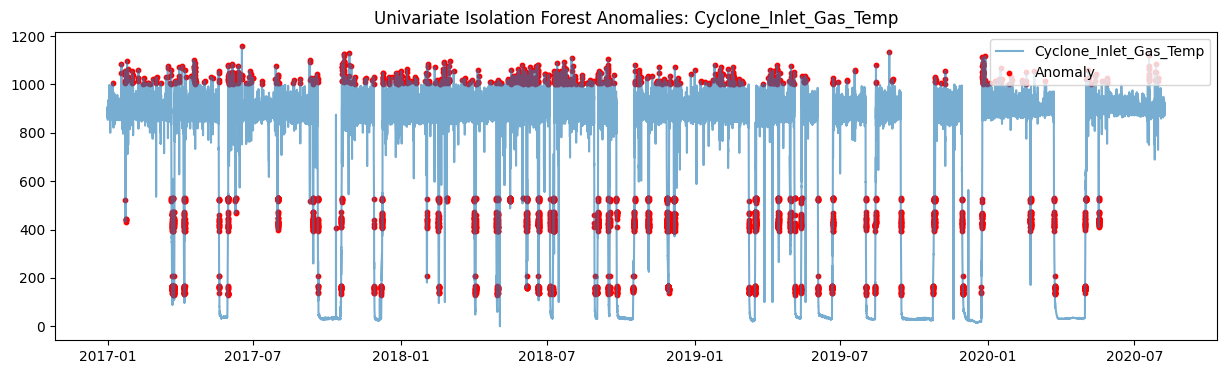

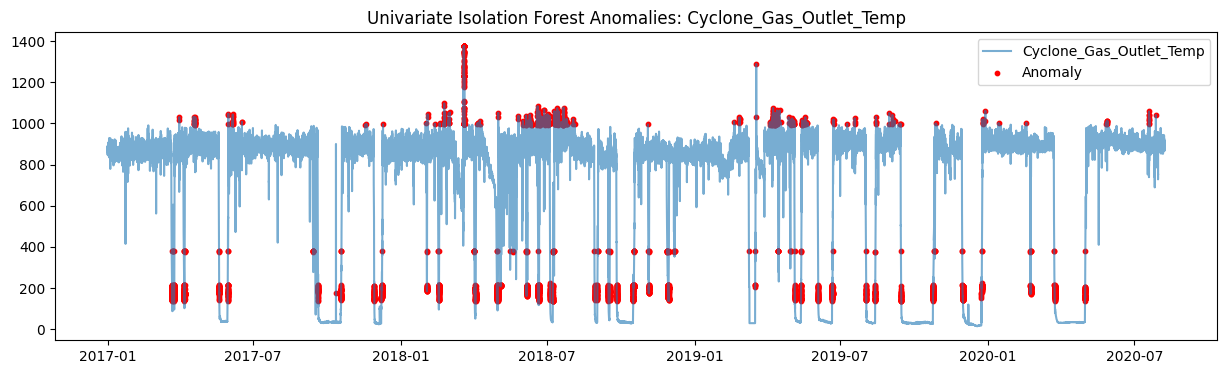

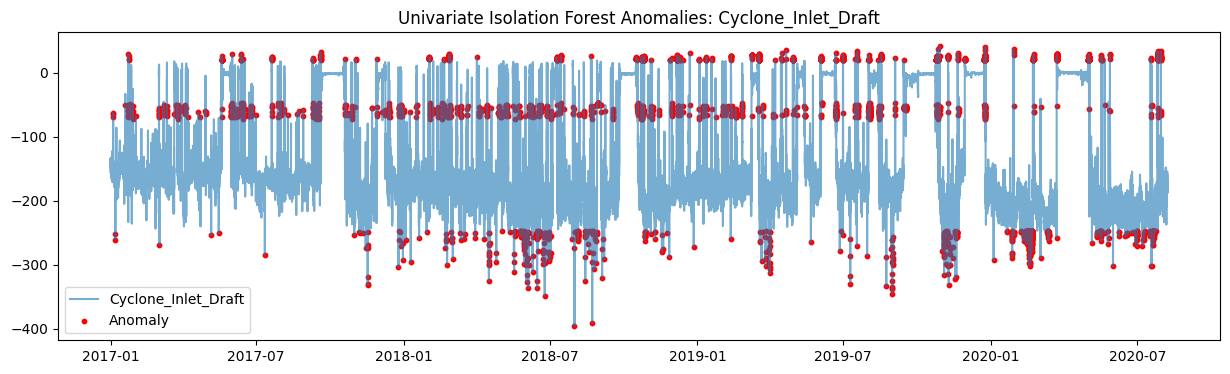

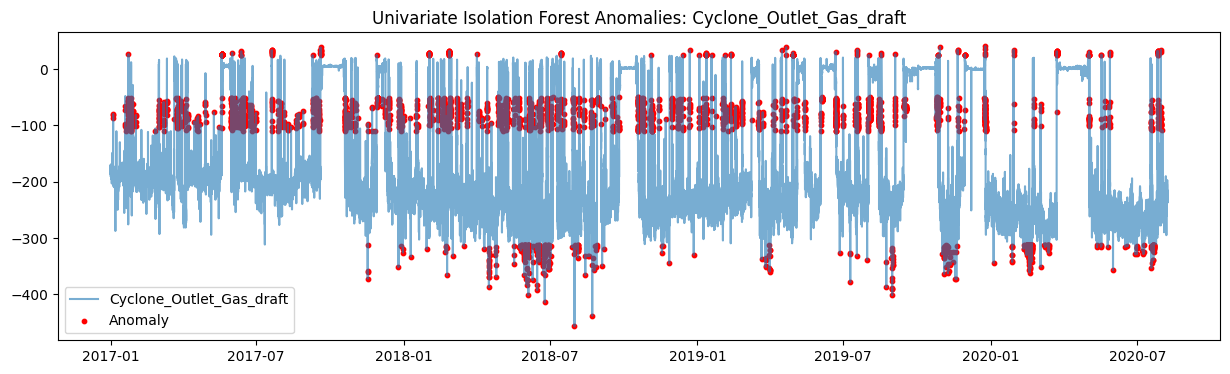

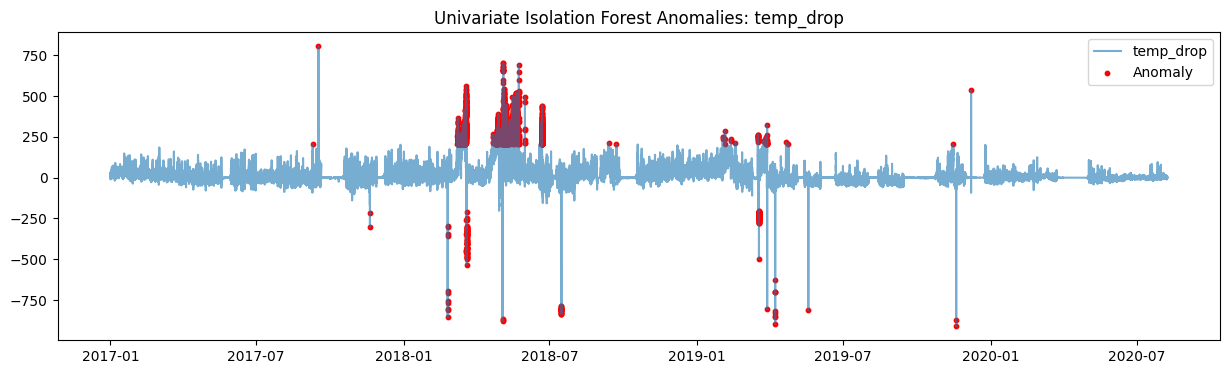

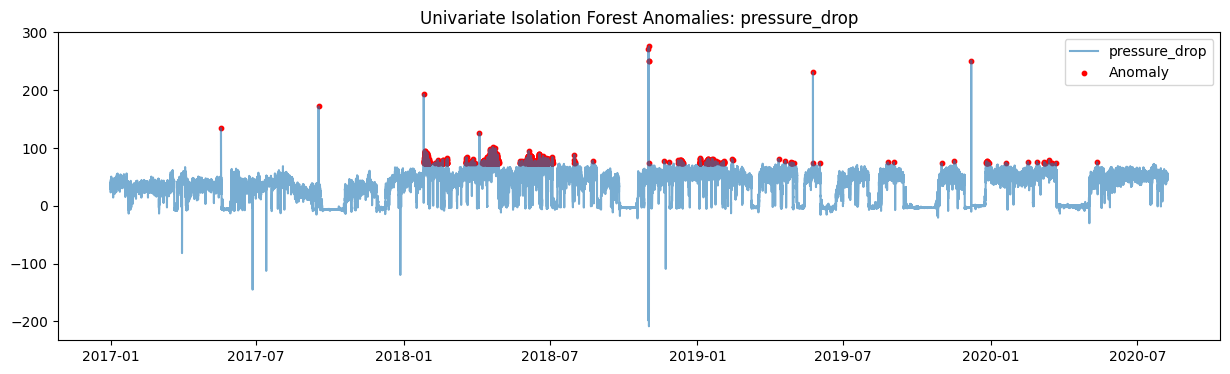

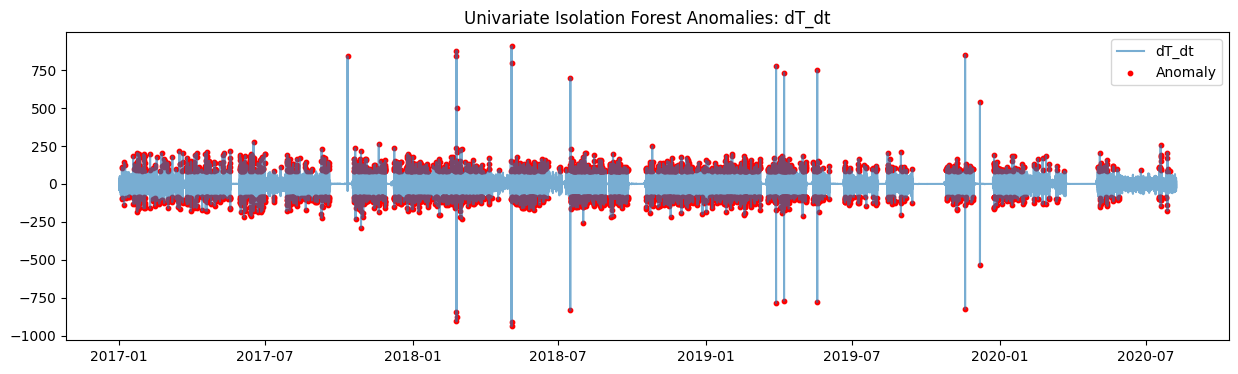

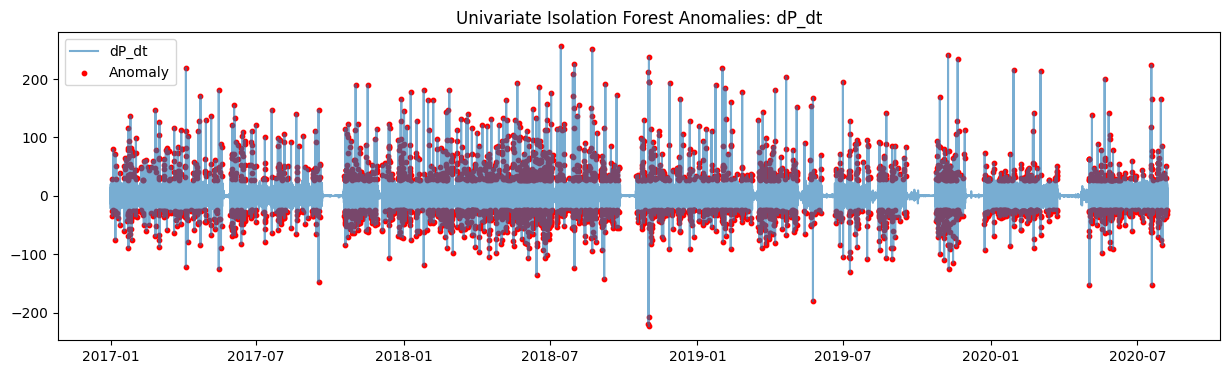

In [37]:
for col, df_col in univariate_results.items():
    plt.figure(figsize=(15,4))
    plt.plot(df_col.index, df_col["value"], alpha=0.6, label=col)
    
    anomaly_pts = df_col[df_col["anomaly"] == 1]
    plt.scatter(anomaly_pts.index, anomaly_pts["value"], color="red", s=10, label="Anomaly")
    
    plt.title(f"Univariate Isolation Forest Anomalies: {col}")
    plt.legend()
    plt.show()


In [38]:
summary = {col: df["anomaly"].sum() for col, df in univariate_results.items()}

pd.DataFrame.from_dict(summary, orient="index", columns=["anomaly_count"]).sort_values("anomaly_count", ascending=False)


,anomaly_count
dP_dt,3767
dT_dt,3766
pressure_drop,3764
temp_drop,3761
Cyclone_Outlet_Gas_draft,3747
Cyclone_Inlet_Draft,3738
Cyclone_Gas_Outlet_Temp,3701
Cyclone_Inlet_Gas_Temp,3665


## LOF

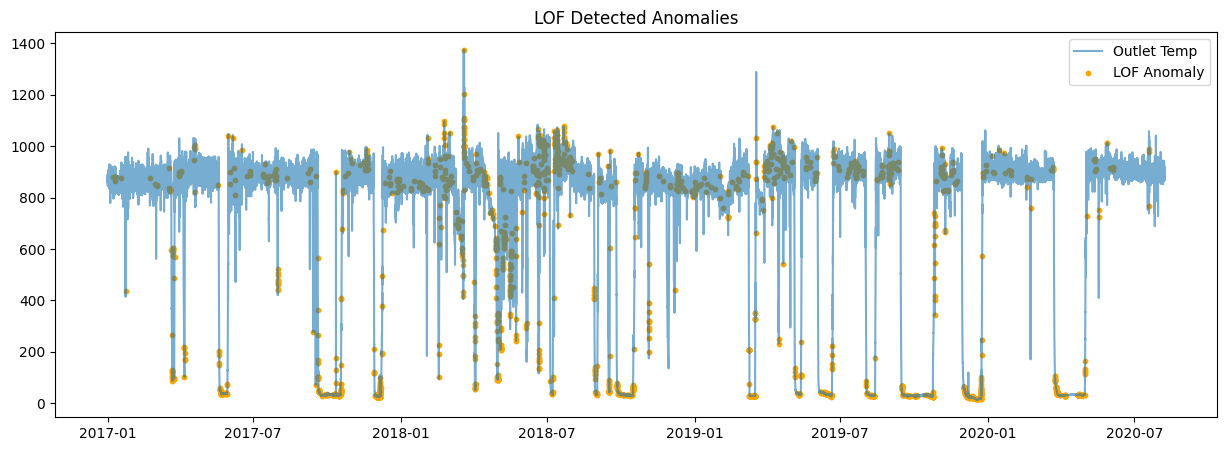

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(
    n_neighbors=50,     
    contamination=0.005, # same as  IF
    novelty=False        
)

y_pred_lof = lof.fit_predict(X_scaled)
df_model["anomaly_lof"] = np.where(y_pred_lof == -1, 1, 0)

df_model["anomaly_lof"].value_counts()
plt.figure(figsize=(15,5))
plt.plot(df_model.index, df_model["Cyclone_Gas_Outlet_Temp"], alpha=0.6, label="Outlet Temp")

lof_points = df_model[df_model["anomaly_lof"] == 1]
plt.scatter(lof_points.index, lof_points["Cyclone_Gas_Outlet_Temp"],
            s=10, color='orange', label="LOF Anomaly")

plt.title("LOF Detected Anomalies")
plt.legend()
plt.show()



In [40]:
pd.crosstab(df_model["anomaly_iforest"], df_model["anomaly_lof"])


anomaly_lof,0,1
anomaly_iforest,,
0,371606,1634
1,3519,252


##  What LOF did well

- Caught anomalies around shutdown and recovery transitions
- Caught slow drifts and noisy clusters
- Marked clusters in mid-high temperature regions

## What LOF did not do

- Did not strongly detect extreme high spikes as uniquely as IF
- Still flags some stable regions mildly
- LOF is good for subtle operational deviations, not extreme events

- Type of anomaly     ==========================Best model
- **Sudden temperature spikes** ================Isolation Forest                
- **Unexpected local temp fluctuations**========= LOF                             
- **Shutdown transitions**======================Both detect edges               


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

univariate_lof_results = {}

for col in features:

    series = df_feat[col].dropna()
    scaler_uni = StandardScaler()
    X_uni = scaler_uni.fit_transform(series.values.reshape(-1,1))
    lof_uni = LocalOutlierFactor(
        n_neighbors=50,
        contamination=0.005,
        novelty=False
    )

    preds = lof_uni.fit_predict(X_uni)
    df_tmp = pd.DataFrame({
        "value": series,
        "anomaly_lof": np.where(preds == -1, 1, 0)
    }, index=series.index)

    univariate_lof_results[col] = df_tmp

    print(df_tmp["anomaly_lof"].value_counts())



=== Processing LOF for Cyclone_Inlet_Gas_Temp ===
anomaly_lof
0    375212
1      1808
Name: count, dtype: int64

=== Processing LOF for Cyclone_Gas_Outlet_Temp ===
anomaly_lof
0    375217
1      1803
Name: count, dtype: int64

=== Processing LOF for Cyclone_Inlet_Draft ===
anomaly_lof
0    375934
1      1086
Name: count, dtype: int64

=== Processing LOF for Cyclone_Outlet_Gas_draft ===
anomaly_lof
0    375151
1      1869
Name: count, dtype: int64

=== Processing LOF for temp_drop ===
anomaly_lof
0    375159
1      1861
Name: count, dtype: int64

=== Processing LOF for pressure_drop ===
anomaly_lof
0    375136
1      1884
Name: count, dtype: int64

=== Processing LOF for dT_dt ===
anomaly_lof
0    375137
1      1874
Name: count, dtype: int64

=== Processing LOF for dP_dt ===
anomaly_lof
0    375131
1      1880
Name: count, dtype: int64


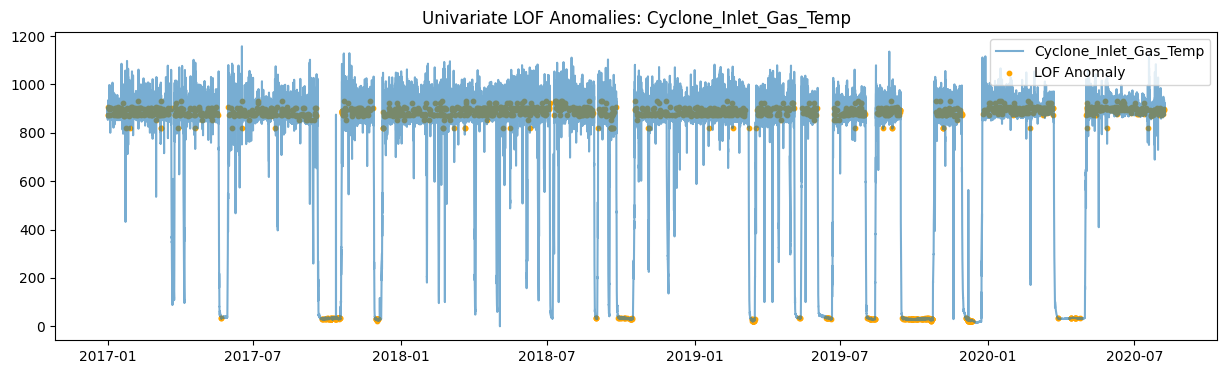

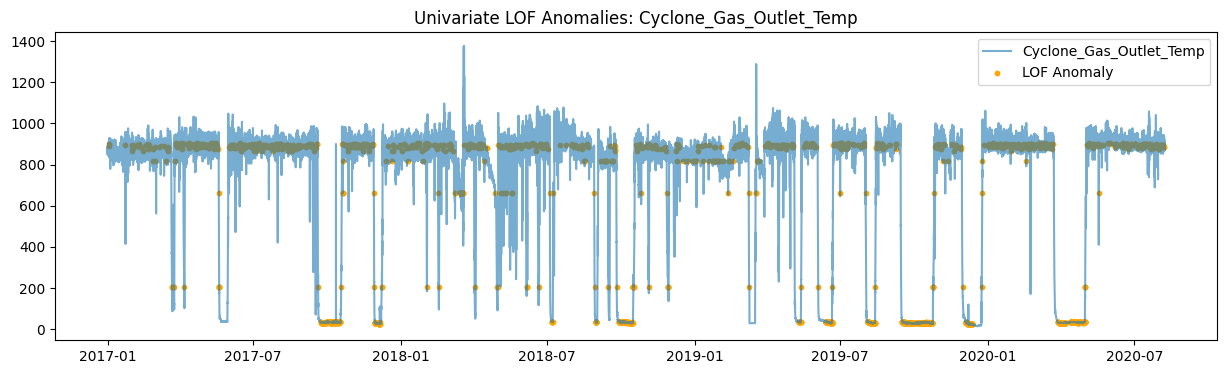

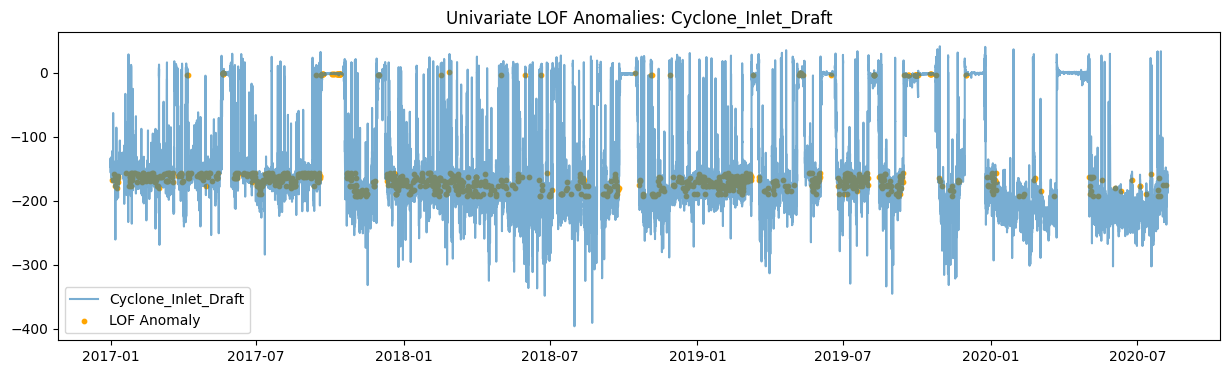

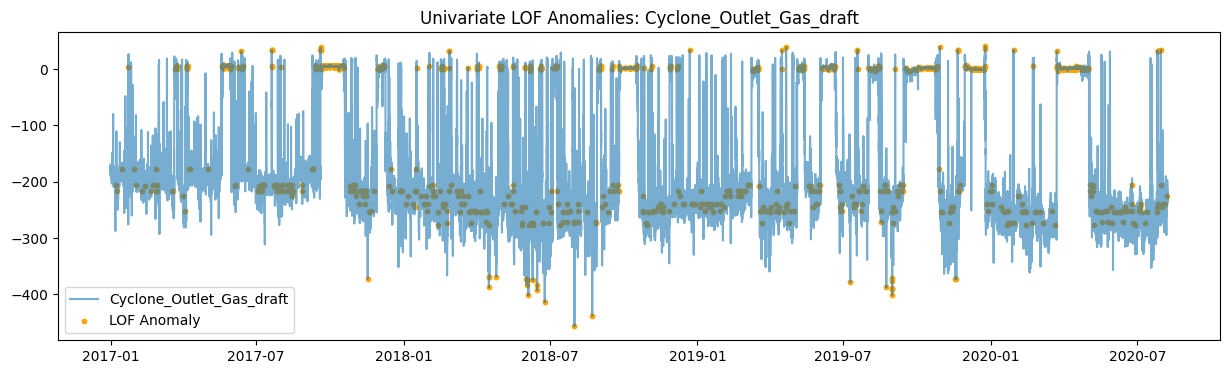

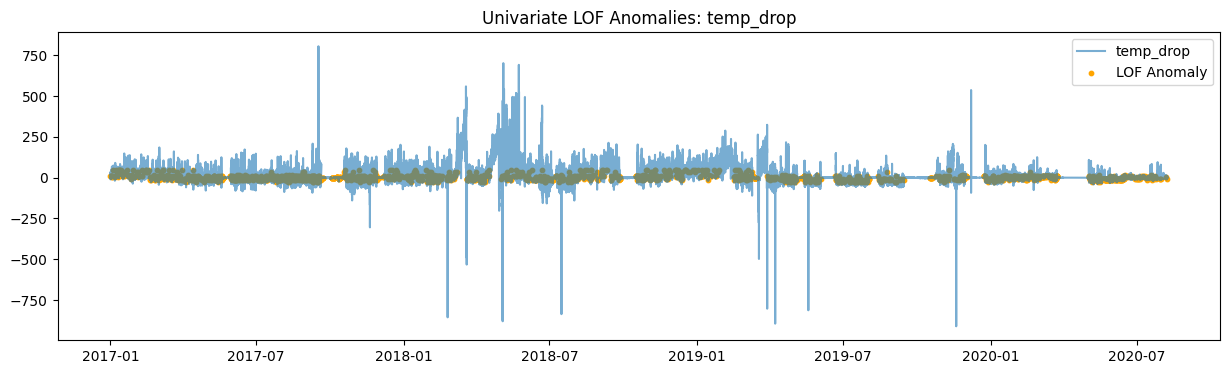

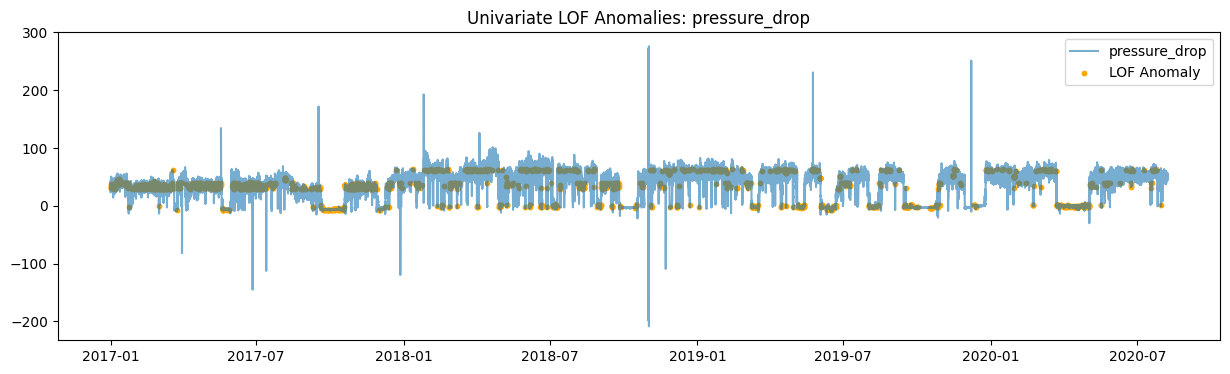

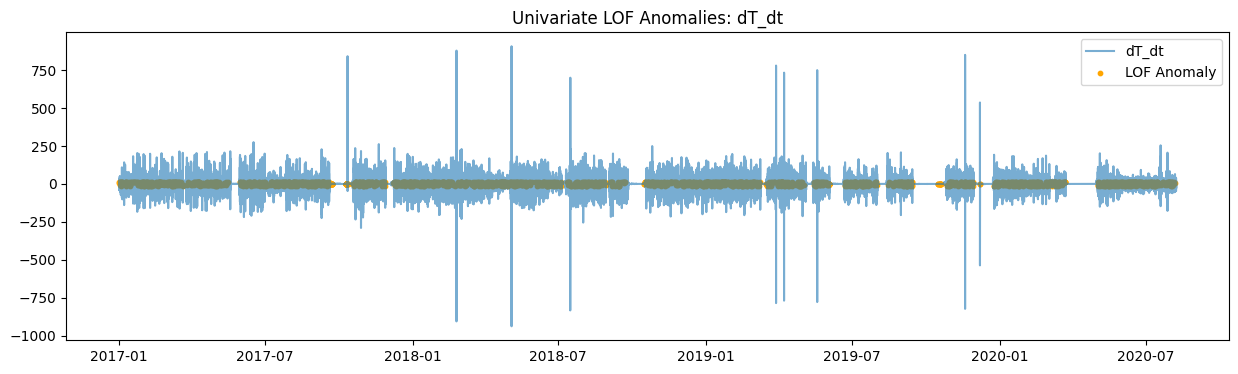

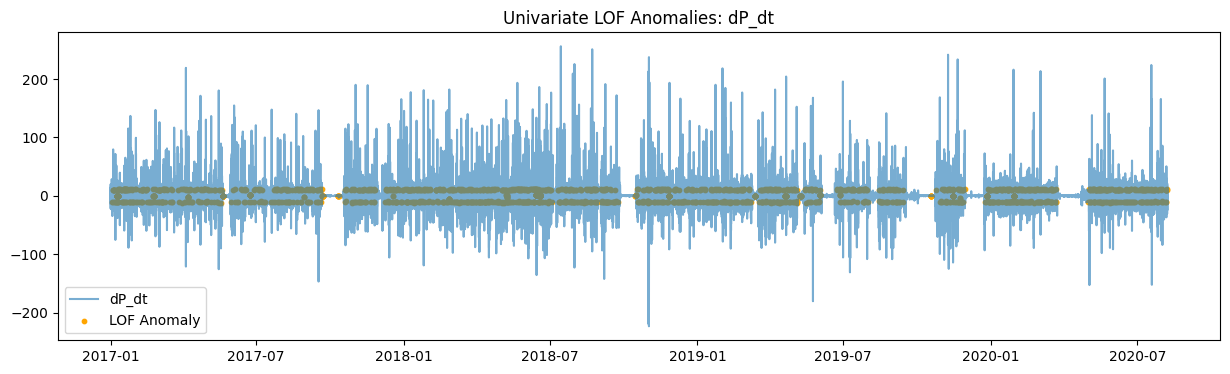

In [42]:
for col, df_col in univariate_lof_results.items():
    plt.figure(figsize=(15,4))
    plt.plot(df_col.index, df_col["value"], alpha=0.6, label=col)
    
    lof_points = df_col[df_col["anomaly_lof"] == 1]
    plt.scatter(lof_points.index, lof_points["value"],
                color="orange", s=10, label="LOF Anomaly")
    
    plt.title(f"Univariate LOF Anomalies: {col}")
    plt.legend()
    plt.show()


In [43]:
lof_summary = {col: df.anomaly_lof.sum() for col, df in univariate_lof_results.items()}
pd.DataFrame.from_dict(lof_summary, orient="index", columns=["lof_anomaly_count"])


,lof_anomaly_count
Cyclone_Inlet_Gas_Temp,1808
Cyclone_Gas_Outlet_Temp,1803
Cyclone_Inlet_Draft,1086
Cyclone_Outlet_Gas_draft,1869
temp_drop,1861
pressure_drop,1884
dT_dt,1874
dP_dt,1880


## LSTM

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential


feature_cols = [
    "Cyclone_Inlet_Gas_Temp",
    "Cyclone_Gas_Outlet_Temp",
    "Cyclone_Material_Temp",
    "Cyclone_Inlet_Draft",
    "Cyclone_Outlet_Gas_draft",
    "Cyclone_cone_draft",
    "temp_drop",
    "pressure_drop",
    "dT_dt",
    "dP_dt"
]
df_lstm = df_feat[
    (df_feat["regime"] == "normal") &
    (df_feat["anomaly_rule_based"] == 0)
][feature_cols].dropna()
scaler_lstm = StandardScaler()
X_all = scaler_lstm.fit_transform(df_lstm.values)

n_samples, n_features = X_all.shape


SEQ_LEN = 288  # 24 hours at 5 min intervals

def create_sequences(data, seq_len):
    seqs = []
    for i in range(len(data) - seq_len + 1):
        seqs.append(data[i:i+seq_len])
    return np.array(seqs)

X_seq = create_sequences(X_all, SEQ_LEN)
print("Sequence array shape:", X_seq.shape)

seq_index = df_lstm.index[SEQ_LEN-1:]
train_size = int(len(X_seq) * 0.8)
X_train = X_seq[:train_size]
X_test  = X_seq[train_size:]


from tensorflow.keras.layers import (
    LSTM, Dense, Dropout, RepeatVector, TimeDistributed,
    LayerNormalization, LeakyReLU
)
model = Sequential([
    LSTM(128, activation="tanh", input_shape=(SEQ_LEN, n_features), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation="tanh", return_sequences=True),
    LayerNormalization(),
    Dropout(0.2),
    LSTM(32, activation="tanh", return_sequences=False),
    RepeatVector(SEQ_LEN),
    TimeDistributed(Dense(64)),
    LeakyReLU(alpha=0.1),
    Dropout(0.1),
    LSTM(32, activation="tanh", return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation="tanh", return_sequences=True),
    LayerNormalization(),
    LSTM(128, activation="tanh", return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(64)),
    LeakyReLU(alpha=0.1),
    TimeDistributed(Dense(n_features, activation=None)),  
])

model.compile(optimizer="adam", loss="mse")
model.summary()



Sequence array shape: (310858, 288, 10)
Sequence index length: 310858
Train seqs: (248686, 288, 10)  Test seqs: (62172, 288, 10)


2025-11-20 05:06:21.403169: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-20 05:06:21.603294: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-20 05:06:22.543162: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
I0000 00:00:1763615183.347672   27429 gpu_devic

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 288, 128)       │        71,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 288, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 288, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 288, 64)        │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 288, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 288, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 288, 64)        │         2,112 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 288, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 288, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 288, 32)        │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 288, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 288, 64)        │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (None, 288, 64)        │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 288, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 288, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 288, 64)        │         8,256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 288, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 288, 10)        │           650 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 280,330 (1.07 MB)

 Trainable params: 280,330 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(
    X_train, X_train,
    epochs=30,
    batch_size=512,
    validation_split=0.1,
    shuffle=False
)


Epoch 1/30


2025-11-20 05:06:52.483774: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


438/438 ━━━━━━━━━━━━━━━━━━━━ 86s 147ms/step - loss: 0.9268 - val_loss: 0.7943
Epoch 2/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/step - loss: 0.8958 - val_loss: 0.8040
Epoch 3/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/step - loss: 0.8741 - val_loss: 0.6003
Epoch 4/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 59s 134ms/step - loss: 1.0151 - val_loss: 1.0573
Epoch 5/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 59s 134ms/step - loss: 1.0575 - val_loss: 1.0700
Epoch 6/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 59s 134ms/step - loss: 1.0581 - val_loss: 1.0742
Epoch 7/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/step - loss: 0.9637 - val_loss: 0.8251
Epoch 8/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/step - loss: 0.8762 - val_loss: 1.1227
Epoch 9/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/step - loss: 0.9221 - val_loss: 0.9364
Epoch 10/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/step - loss: 0.8993 - val_loss: 0.8432
Epoch 11/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/step - loss: 0.8670 - val_loss: 0.6968
Epoch 12/30
438/438 ━━━━━━━━━━

In [ ]:

X_train_pred = model.predict(X_train)
train_loss = np.mean(np.mean((X_train_pred - X_train)**2, axis=2), axis=1)

print("Train loss stats:")
print("min:", train_loss.min(), "max:", train_loss.max())


1077/7772 ━━━━━━━━━━━━━━━━━━━━ 3:59 36ms/step

7772/7772 ━━━━━━━━━━━━━━━━━━━━ 288s 37ms/step
Train loss stats:
min: 0.0863966831609076 max: 6.346056126712083


In [47]:
threshold = np.percentile(train_loss, 99)
print("Reconstruction error threshold:", threshold)
X_all_pred = model.predict(X_seq)
all_loss = np.mean(np.mean((X_all_pred - X_seq)**2, axis=2), axis=1)

lstm_results = pd.DataFrame({
    "time": seq_index,
    "recon_error": all_loss
}).set_index("time")

lstm_results["anomaly_lstm"] = (lstm_results["recon_error"] > threshold).astype(int)

print(lstm_results["anomaly_lstm"].value_counts())
lstm_results.head()



Reconstruction error threshold: 2.8978792127916377
   7/9715 ━━━━━━━━━━━━━━━━━━━━ 6:14 39ms/step

9715/9715 ━━━━━━━━━━━━━━━━━━━━ 349s 36ms/step
anomaly_lstm
0    308357
1      2501
Name: count, dtype: int64


,recon_error,anomaly_lstm
time,,
2017-01-02 00:00:00,0.209922,0
2017-01-02 00:05:00,0.210792,0
2017-01-02 00:10:00,0.211460,0
2017-01-02 00:15:00,0.212237,0
2017-01-02 00:20:00,0.214473,0


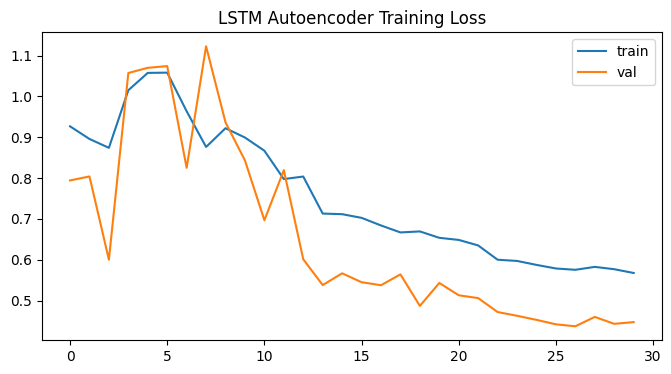

In [48]:

plt.figure(figsize=(8,4))
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.title("LSTM Autoencoder Training Loss")
plt.show()


In [49]:
if_labels = df_model.loc[lstm_results.index, "anomaly_iforest"]
lof_labels = df_model.loc[lstm_results.index, "anomaly_lof"]

compare = pd.crosstab(lstm_results["anomaly_lstm"], if_labels,
                      rownames=["LSTM"], colnames=["IF"])

compare


IF,0,1
LSTM,,
0,305249,3108
1,2256,245


In [ ]:

compare_lof = pd.crosstab(lstm_results["anomaly_lstm"], lof_labels,
                          rownames=["LSTM"], colnames=["LOF"])
compare_lof


LOF,0,1
LSTM,,
0,307537,820
1,2403,98
